## Setup

In [6]:
# Data handling and visualization
import matplotlib.pyplot as plt
import pandas as pd

# Model evaluation
from sklearn import metrics

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Load models
import joblib

In [3]:
# Evaluation
def model_evaluation(test_labels, model_preds):
    # Evaluación
    print("Evaluation results")
    print(f"Accuracy:{metrics.accuracy_score(test_labels, model_preds)}")
    print(f"F-1 weighted: {metrics.f1_score(test_labels, model_preds)}")
    print(f"Precision: {metrics.precision_score(test_labels, model_preds)}")
    print(f"Recall: {metrics.recall_score(test_labels, model_preds)}")
    print(f"AUROC weighted: {metrics.roc_auc_score(test_labels, model_preds, average='weighted')}")

    # Confusion matrix
    svm_confusion_matrix=confusion_matrix(test_labels, model_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix)
    disp.plot()
    plt.show()

    # Classification report
    print(metrics.classification_report(test_labels, model_preds))

    # Plot ROC curve
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_labels, model_preds)
    auc_roc = metrics.roc_auc_score(test_labels, model_preds, average='weighted')
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


In [4]:
data = pd.read_csv("../results/cardiovascular_disease_clean.csv")

for col in ["Smoke", "Alcohol", "Active", "cardio_disease"]:
    data[col] = data[col].map({'No': 0, 'Yes': 1})

for col in ["Cholesterol", "Glucose"]:
    data[col] = data[col].map({'Normal': 1, 'Above-Normal': 2, 'Well-Above-Normal':3})

# We previously found that gender and height doesn't apport information we discard it
train_data = data.drop(columns=["Gender", "Height(cm)", "cardio_disease"])
cardio_disease = data.loc[:,"cardio_disease"]

train_data

,Age(years),Weight(kg),SystolicPressure,DiastolicPressure,Cholesterol,Glucose,Smoke,Alcohol,Active,BMI,Pulse
0,50.391781,62.0,110,80,1,1,0,0,1,21.967120,30
1,55.419178,85.0,140,90,3,1,0,0,1,34.927679,50
2,51.663014,64.0,130,70,3,1,0,0,0,23.507805,60
3,48.282192,82.0,150,100,1,1,0,0,1,28.710479,50
4,47.873973,56.0,100,60,1,1,0,0,0,23.011177,40
...,...,...,...,...,...,...,...,...,...,...,...
67235,57.736986,80.0,150,80,1,1,0,0,1,29.384757,70
67236,52.712329,76.0,120,80,1,1,1,0,1,26.927438,40
67237,52.235616,105.0,180,90,3,1,0,1,0,31.353579,90
67238,61.454795,72.0,135,80,1,2,0,0,0,27.099251,55


In [7]:
# Split the raw data into training and testing sets 
train_features, test_features, train_labels, test_labels = train_test_split(train_data, cardio_disease.values, test_size = 0.2, random_state = 42)
print("Raw data")
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Raw data
Training Features Shape: (53792, 11)
Training Labels Shape: (53792,)
Testing Features Shape: (13448, 11)
Testing Labels Shape: (13448,)


## Model Evalluation

### Polynomial kernel

In [12]:
# Load model
polynomial_svm = joblib.load("../results/svms/raw_data/polynomial/None_scale_polynomial_kernel_svm_model.pkl")

# Predict
polynomial_svm_preds = polynomial_svm.predict(test_features)

/export/storage/users/diegocar/.Apps/.conda/envs/prj_datasci/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluation results
Accuracy:0.72761748958953
F-1 weighted: 0.7013939838591343
Precision: 0.7742980561555075
Recall: 0.6410371032632991
AUROC weighted: 0.7274504204159749


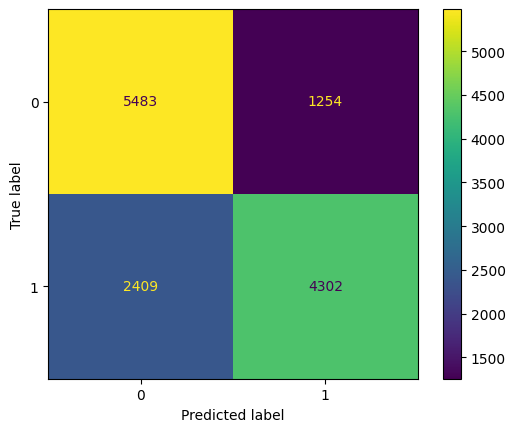

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      6737
           1       0.77      0.64      0.70      6711

    accuracy                           0.73     13448
   macro avg       0.73      0.73      0.73     13448
weighted avg       0.73      0.73      0.73     13448



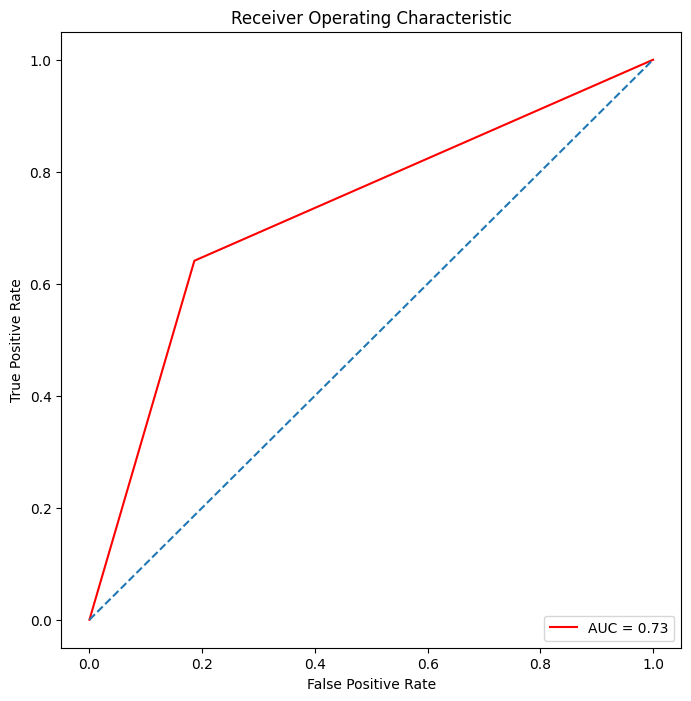

In [13]:
model_evaluation(test_labels=test_labels, model_preds=polynomial_svm_preds)

### Radial Basis Function kernel

In [16]:
# Load model
rbf_svm = joblib.load("../results/svms/raw_data/rbf/None_scale_rbf_kernel_svm_model.pkl")

# Predict
rbf_svm_preds = rbf_svm.predict(test_features)

/export/storage/users/diegocar/.Apps/.conda/envs/prj_datasci/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluation results
Accuracy:0.723750743604997
F-1 weighted: 0.703724379934604
Precision: 0.757035003431709
Recall: 0.65742810311429
AUROC weighted: 0.7236227646341822


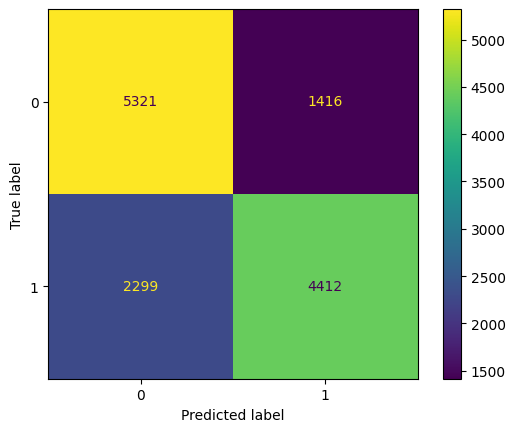

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6737
           1       0.76      0.66      0.70      6711

    accuracy                           0.72     13448
   macro avg       0.73      0.72      0.72     13448
weighted avg       0.73      0.72      0.72     13448



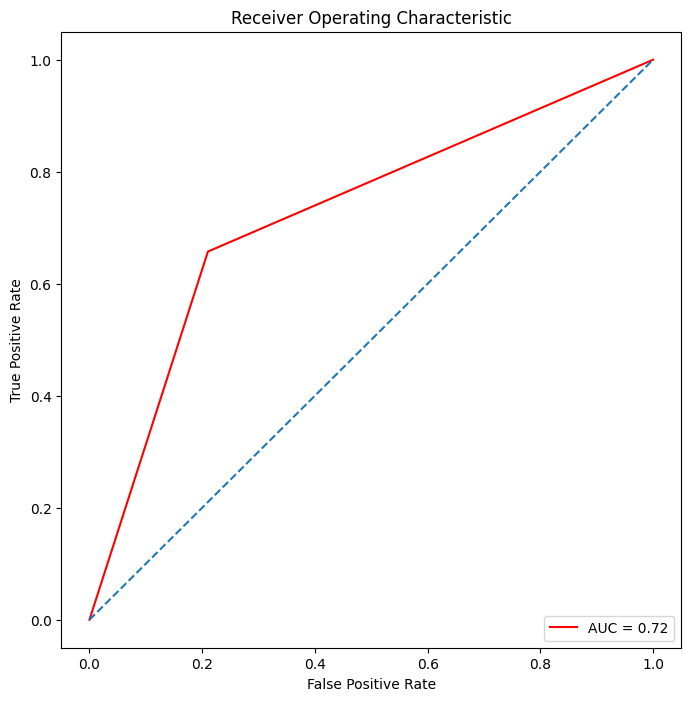

In [17]:
model_evaluation(test_labels=test_labels, model_preds=rbf_svm_preds)